# Projet Machine-Learning Antoine Théologien
## SGD et Optim

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from loss import *
from mltools import *

def SGD(network, datax, datay, loss, batch_size=10, lr=0.01, epochs=500):

    optimizer = Optim(network, loss, eps=lr)
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(len(datax))  
        batch_losses = []

        for i in range(0, len(datax), batch_size):
            batch_x = datax[indices[i:i + batch_size]]
            batch_y = datay[indices[i:i + batch_size]]

            optimizer.step(batch_x, batch_y)  

            y_hat = network.forward(batch_x)
            batch_loss = loss.forward(batch_y, y_hat).mean()
            batch_losses.append(batch_loss)

        losses.append(np.mean(batch_losses))  

        if epoch % 50 == 0:
            print(f"Époque {epoch}, Perte : {losses[-1]:.4f}")

    return losses, network

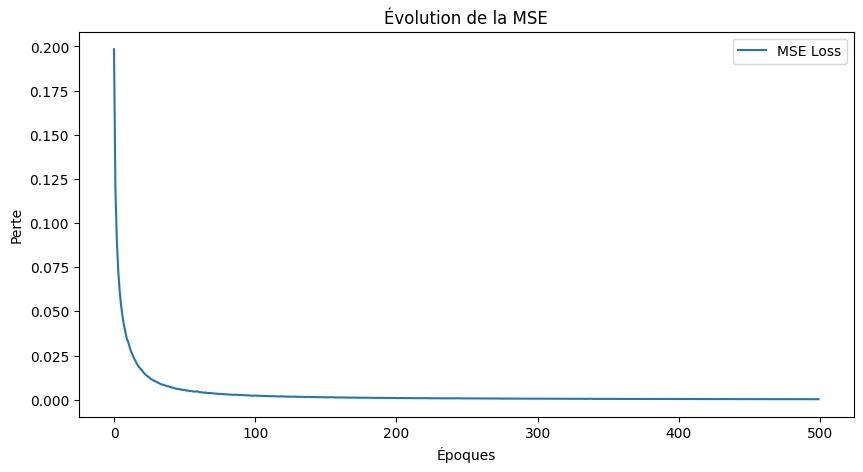

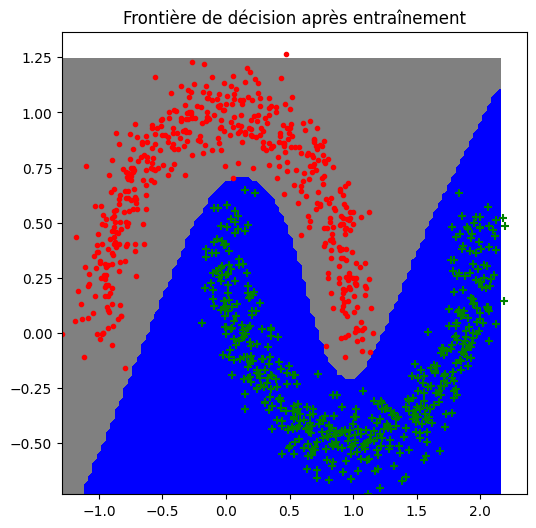

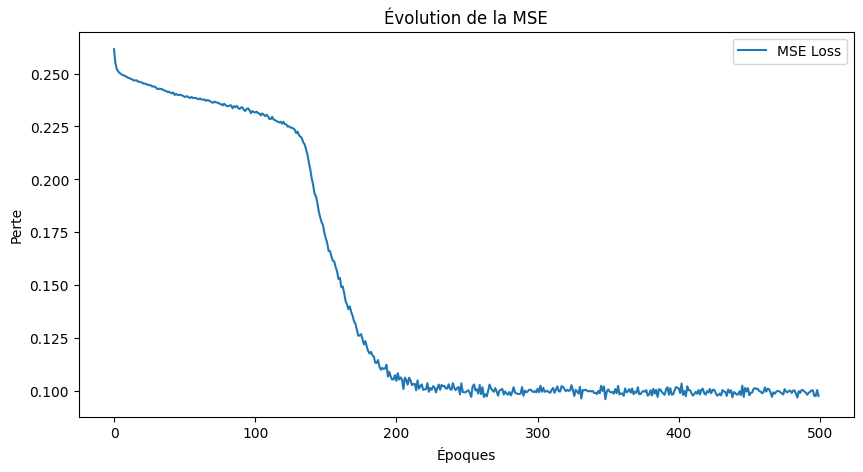

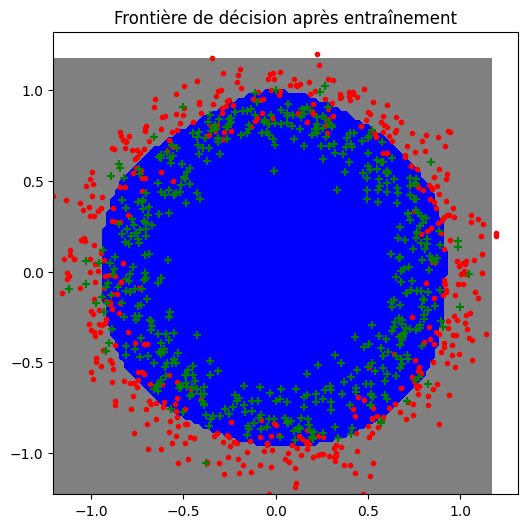

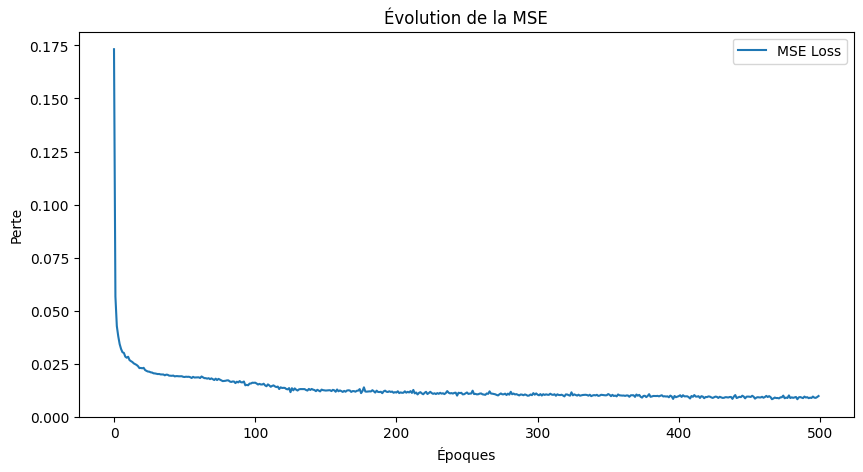

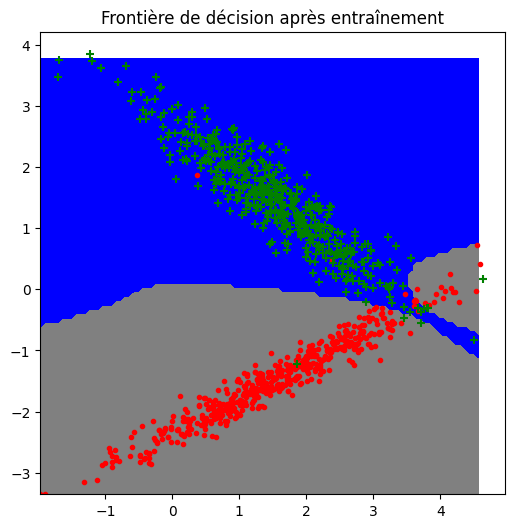

In [3]:
for i in [0,1,2]:

    datax, datay = gen_arti2(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1)

    model = Sequentiel(
        Linear(2, 5),
        TanH(),
        Linear(5, 5),
        TanH(),
        Linear(5, 5),
        TanH(),
        Linear(5, 1),
        Sigmoide()
    )
    loss = MSELoss()

    optimizer = Optim(model, loss, eps=0.05)

    epochs = 500
    batch_size = 16
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(len(datax))
        batch_losses = []

        for i in range(0, len(datax), batch_size):
            batch_x = datax[indices[i:i + batch_size]]
            batch_y = datay[indices[i:i + batch_size]]

            optimizer.step(batch_x, batch_y)

            y_hat = model.forward(batch_x)
            batch_loss = loss.forward(batch_y, y_hat).mean()
            batch_losses.append(batch_loss)

        losses.append(np.mean(batch_losses))

    plt.figure(figsize=(10, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.title("Évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(model.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision après entraînement")
    plt.show()


Époque 0, Perte : 0.1602
Époque 50, Perte : 0.0081
Époque 100, Perte : 0.0037
Époque 150, Perte : 0.0023
Époque 200, Perte : 0.0017
Époque 250, Perte : 0.0013
Époque 300, Perte : 0.0010
Époque 350, Perte : 0.0008
Époque 400, Perte : 0.0007
Époque 450, Perte : 0.0006


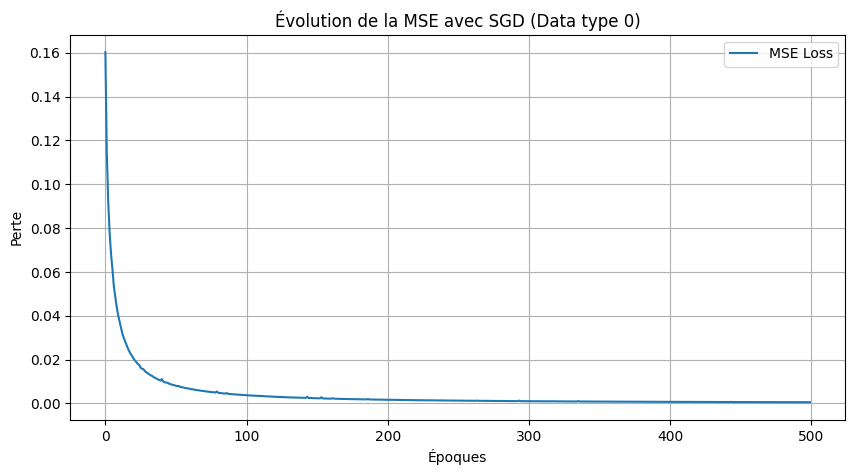

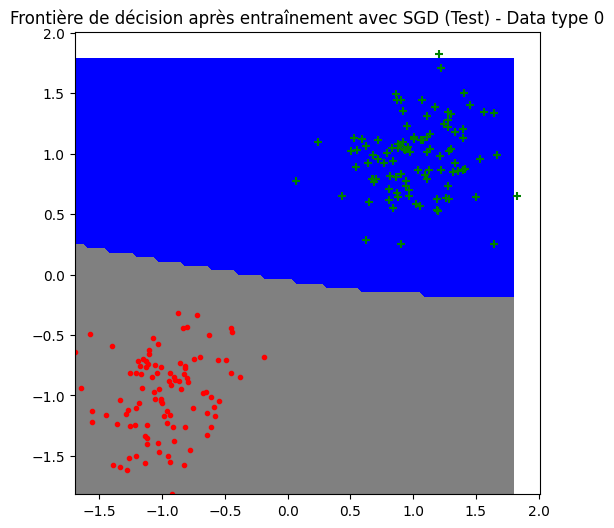

Test Loss (Data type 0): 0.0005
Époque 0, Perte : 0.2303
Époque 50, Perte : 0.1413
Époque 100, Perte : 0.1194
Époque 150, Perte : 0.0341
Époque 200, Perte : 0.0172
Époque 250, Perte : 0.0111
Époque 300, Perte : 0.0083
Époque 350, Perte : 0.0066
Époque 400, Perte : 0.0055
Époque 450, Perte : 0.0047


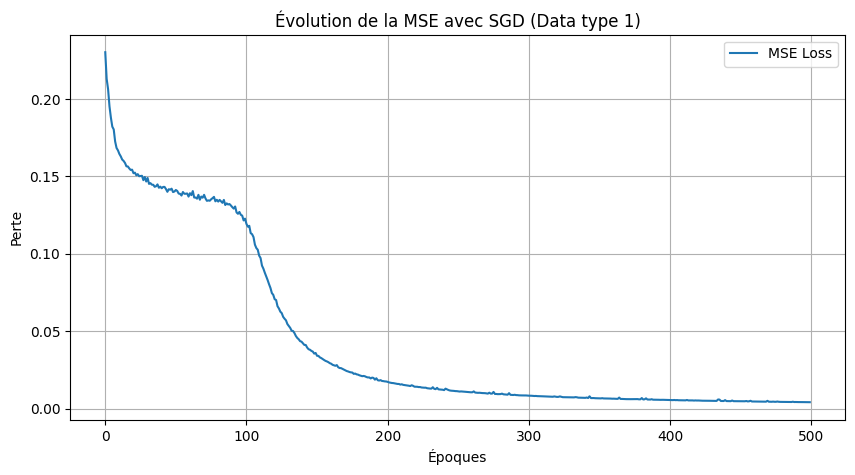

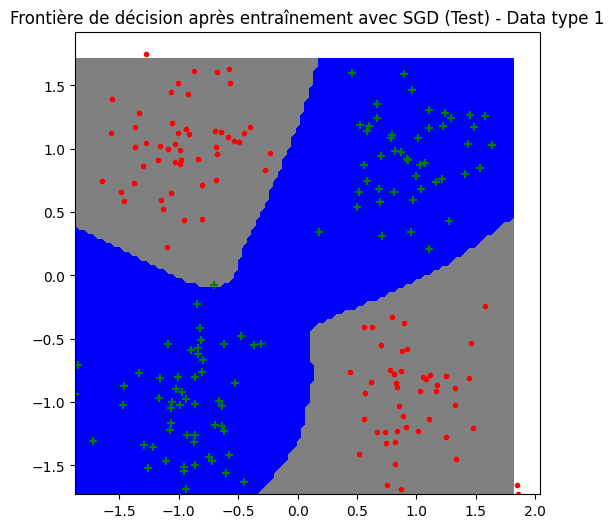

Test Loss (Data type 1): 0.0044
Époque 0, Perte : 0.3743
Époque 50, Perte : 0.2534
Époque 100, Perte : 0.2398
Époque 150, Perte : 0.2391
Époque 200, Perte : 0.2374
Époque 250, Perte : 0.2369
Époque 300, Perte : 0.2335
Époque 350, Perte : 0.2274
Époque 400, Perte : 0.2222
Époque 450, Perte : 0.2204


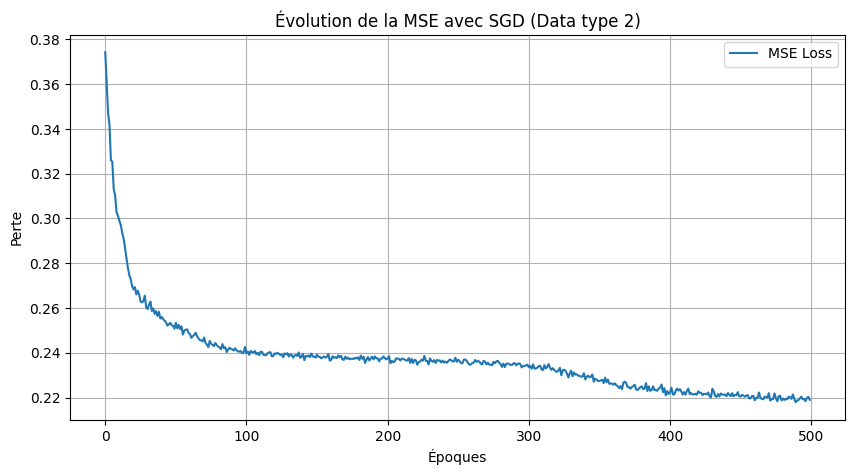

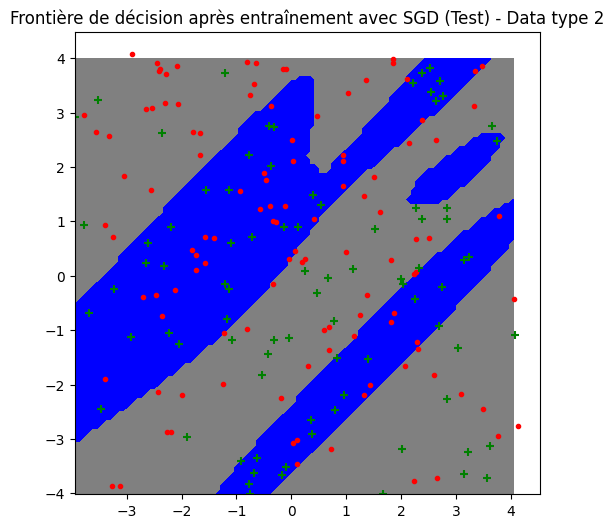

Test Loss (Data type 2): 0.2204


In [12]:
from sklearn.model_selection import train_test_split


for i in [0, 1, 2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = np.where(datay == -1, 0, 1).reshape((-1, 1))


    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    network = Sequentiel(
        Linear(2, 5),
        TanH(),
        Linear(5, 10),
        TanH(),
        Linear(10, 5),
        TanH(),
        Linear(5, 1),
        Sigmoide()
    )
    loss = MSELoss()

    losses, trained_model = SGD(network, datax, datay, loss, batch_size=32, lr=0.01, epochs=500)

    y_pred_test = trained_model.forward(X_test)
    test_loss = np.mean(loss.forward(y_test, y_pred_test))

    plt.figure(figsize=(10, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.title(f"Évolution de la MSE avec SGD (Data type {i})")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(X_test, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision après entraînement avec SGD (Test) - Data type {i}")
    plt.show()

    print(f"Test Loss (Data type {i}): {test_loss:.4f}")


Époque 0, Perte : 0.3776
Époque 50, Perte : 0.0649
Époque 100, Perte : 0.0373
Époque 150, Perte : 0.0202
Époque 200, Perte : 0.0116
Époque 250, Perte : 0.0073
Époque 300, Perte : 0.0050
Époque 350, Perte : 0.0036
Époque 400, Perte : 0.0027
Époque 450, Perte : 0.0021


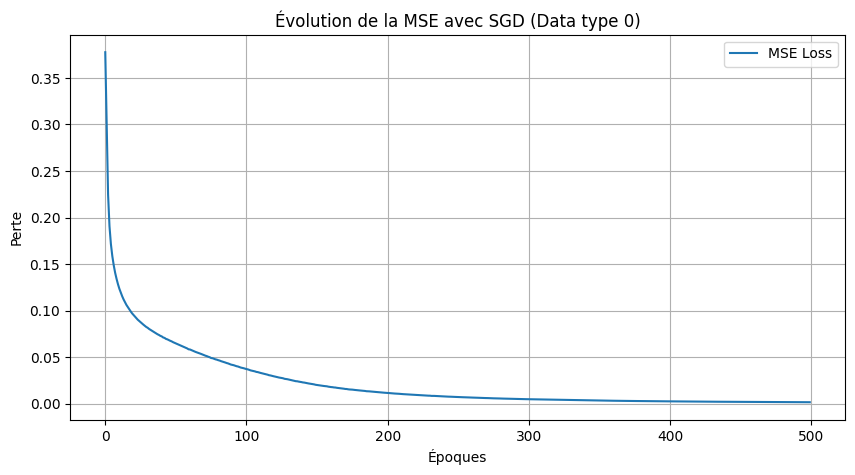

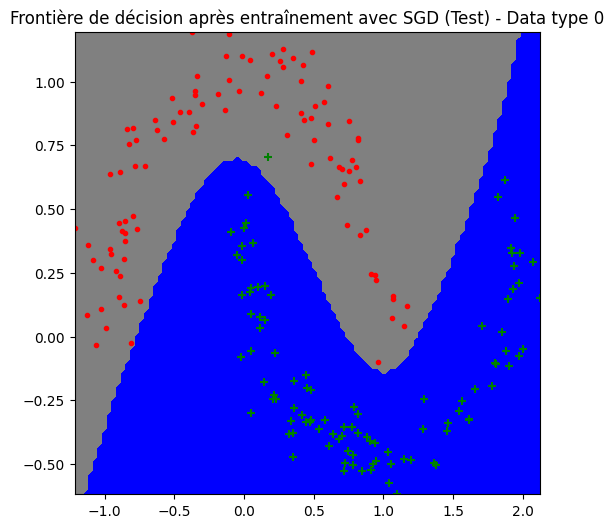

Test Loss (Data type 0): 0.0067
Époque 0, Perte : 0.3942
Époque 50, Perte : 0.2073
Époque 100, Perte : 0.1813
Époque 150, Perte : 0.1628
Époque 200, Perte : 0.1488
Époque 250, Perte : 0.1389
Époque 300, Perte : 0.1314
Époque 350, Perte : 0.1247
Époque 400, Perte : 0.1217
Époque 450, Perte : 0.1185


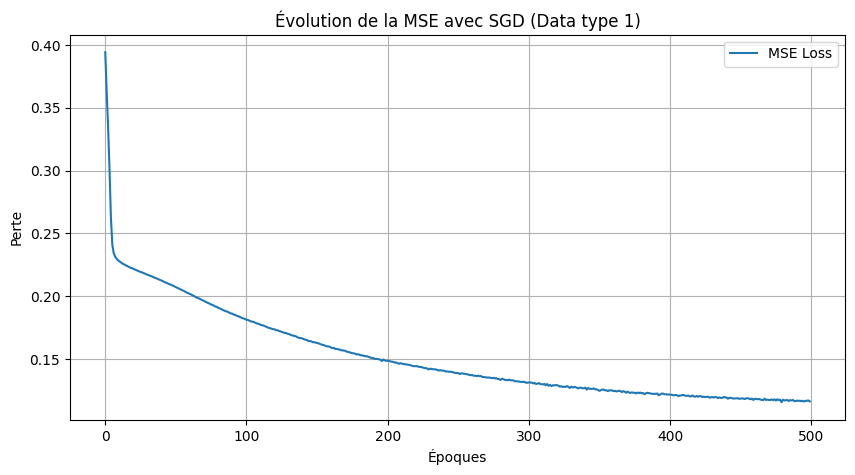

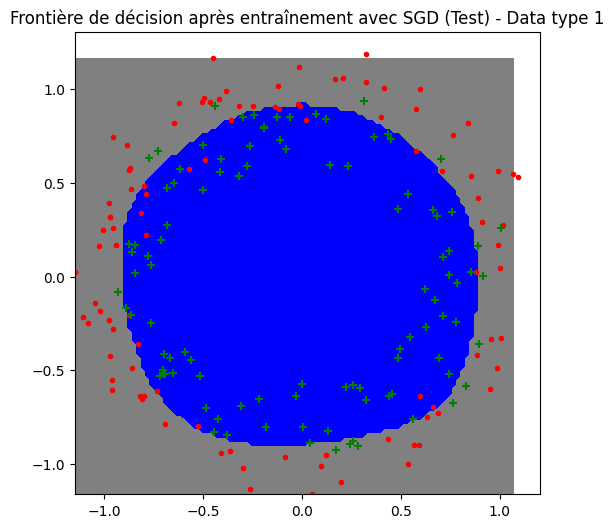

Test Loss (Data type 1): 0.1179
Époque 0, Perte : 0.4547
Époque 50, Perte : 0.0195
Époque 100, Perte : 0.0174
Époque 150, Perte : 0.0168
Époque 200, Perte : 0.0164
Époque 250, Perte : 0.0161
Époque 300, Perte : 0.0160
Époque 350, Perte : 0.0158
Époque 400, Perte : 0.0157
Époque 450, Perte : 0.0156


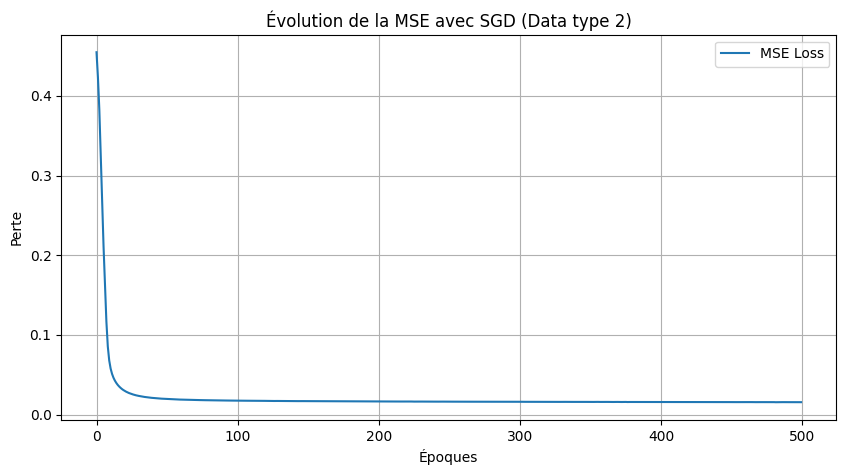

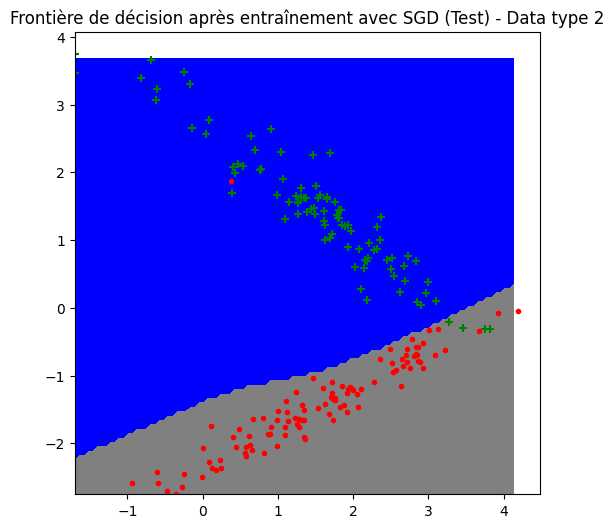

Test Loss (Data type 2): 0.0239


In [13]:
for i in [0, 1, 2]:
    datax, datay = gen_arti2(data_type=i, epsilon=0.1)


    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    network = Sequentiel(
        Linear(2, 5),
        TanH(),
        Linear(5, 10),
        TanH(),
        Linear(10, 5),
        TanH(),
        Linear(5, 1),
        Sigmoide()
    )
    loss = MSELoss()

    losses, trained_model = SGD(network, X_train, y_train, loss, batch_size=32, lr=0.01, epochs=500)

    y_pred_test = trained_model.forward(X_test)
    test_loss = np.mean(loss.forward(y_test, y_pred_test))

    plt.figure(figsize=(10, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.title(f"Évolution de la MSE avec SGD (Data type {i})")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(X_test, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision après entraînement avec SGD (Test) - Data type {i}")
    plt.show()

    print(f"Test Loss (Data type {i}): {test_loss:.4f}")
